# EDA Data Finance Project

### Import Pandas & Load Dataset

In [1]:
import pandas as pd

loan_payments_csv_df = pd.read_csv("loan_payments.csv")   #imports extracted csv file


### Initial exploration of the data contained within the dataframe.

Explore the shape of the dataframe.

In [2]:
shape = loan_payments_csv_df.shape
print(f'This dataset has {shape[0]} rows and {shape[1]} columns')

This dataset has 54231 rows and 43 columns


Identify the datatypes from each column within the dataframe.

In [3]:
print(loan_payments_csv_df.dtypes)

id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                            object
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length               object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_accounts                    int64
total_accounts           

### Correcting Column Datatypes

Load in the DataTransform Class to modify columns to the correct datatype, and then print modified datatypes and the first 5 rows of the modified dataframe.

In [4]:
from db_utils_local import DataTransform

transformer = DataTransform(loan_payments_csv_df)

transformer.convert_int_column_to_float('loan_amount')
transformer.extract_nums_from_start_string('term')
transformer.convert_column_to_category('application_type')
transformer.convert_column_to_category('grade')
transformer.convert_column_to_category('sub_grade')
transformer.convert_column_to_category('employment_length')
transformer.convert_column_to_category('home_ownership')
transformer.convert_column_to_category('verification_status')
transformer.convert_column_to_datetime('issue_date')
transformer.convert_column_to_category('loan_status')
transformer.convert_column_to_category('payment_plan')
transformer.convert_column_to_category('purpose')
transformer.convert_column_to_datetime('earliest_credit_line')
transformer.convert_column_to_datetime('last_payment_date')
transformer.convert_column_to_datetime('next_payment_date')
transformer.convert_column_to_datetime('last_credit_pull_date')
transformer.convert_column_to_category('application_type')



modified_df = transformer.return_dataframe()

print(modified_df.dtypes)
#print(modified_df.loc[:,['issue_date','loan_amount','term', 'employment_length']].head(20))
print(modified_df.head(20))

id                                      int64
member_id                               int64
loan_amount                           float64
funded_amount                         float64
funded_amount_inv                     float64
term                                    Int64
int_rate                              float64
instalment                            float64
grade                                category
sub_grade                            category
employment_length                    category
home_ownership                       category
annual_inc                            float64
verification_status                  category
issue_date                     datetime64[ns]
loan_status                          category
payment_plan                         category
purpose                              category
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6mths                    

Load in the DataFrameInfo Class to extract information from the dataframe and it's columns.

In [5]:
from db_utils_local import DataframeInfo

df_info = DataframeInfo(modified_df)

print(df_info.describe_columns())
print(df_info.extract_statistics())
print(df_info.count_dist_values_cat())
print(df_info.shape_of_df())
print(df_info.count_percent_null())





id                                      int64
member_id                               int64
loan_amount                           float64
funded_amount                         float64
funded_amount_inv                     float64
term                                    Int64
int_rate                              float64
instalment                            float64
grade                                category
sub_grade                            category
employment_length                    category
home_ownership                       category
annual_inc                            float64
verification_status                  category
issue_date                     datetime64[ns]
loan_status                          category
payment_plan                         category
purpose                              category
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6mths                    

### Null Values

In the section above the null values are clearly identified within each category. To start with we can visualise the missing data using a missingno matrix, shown below:

<Axes: >

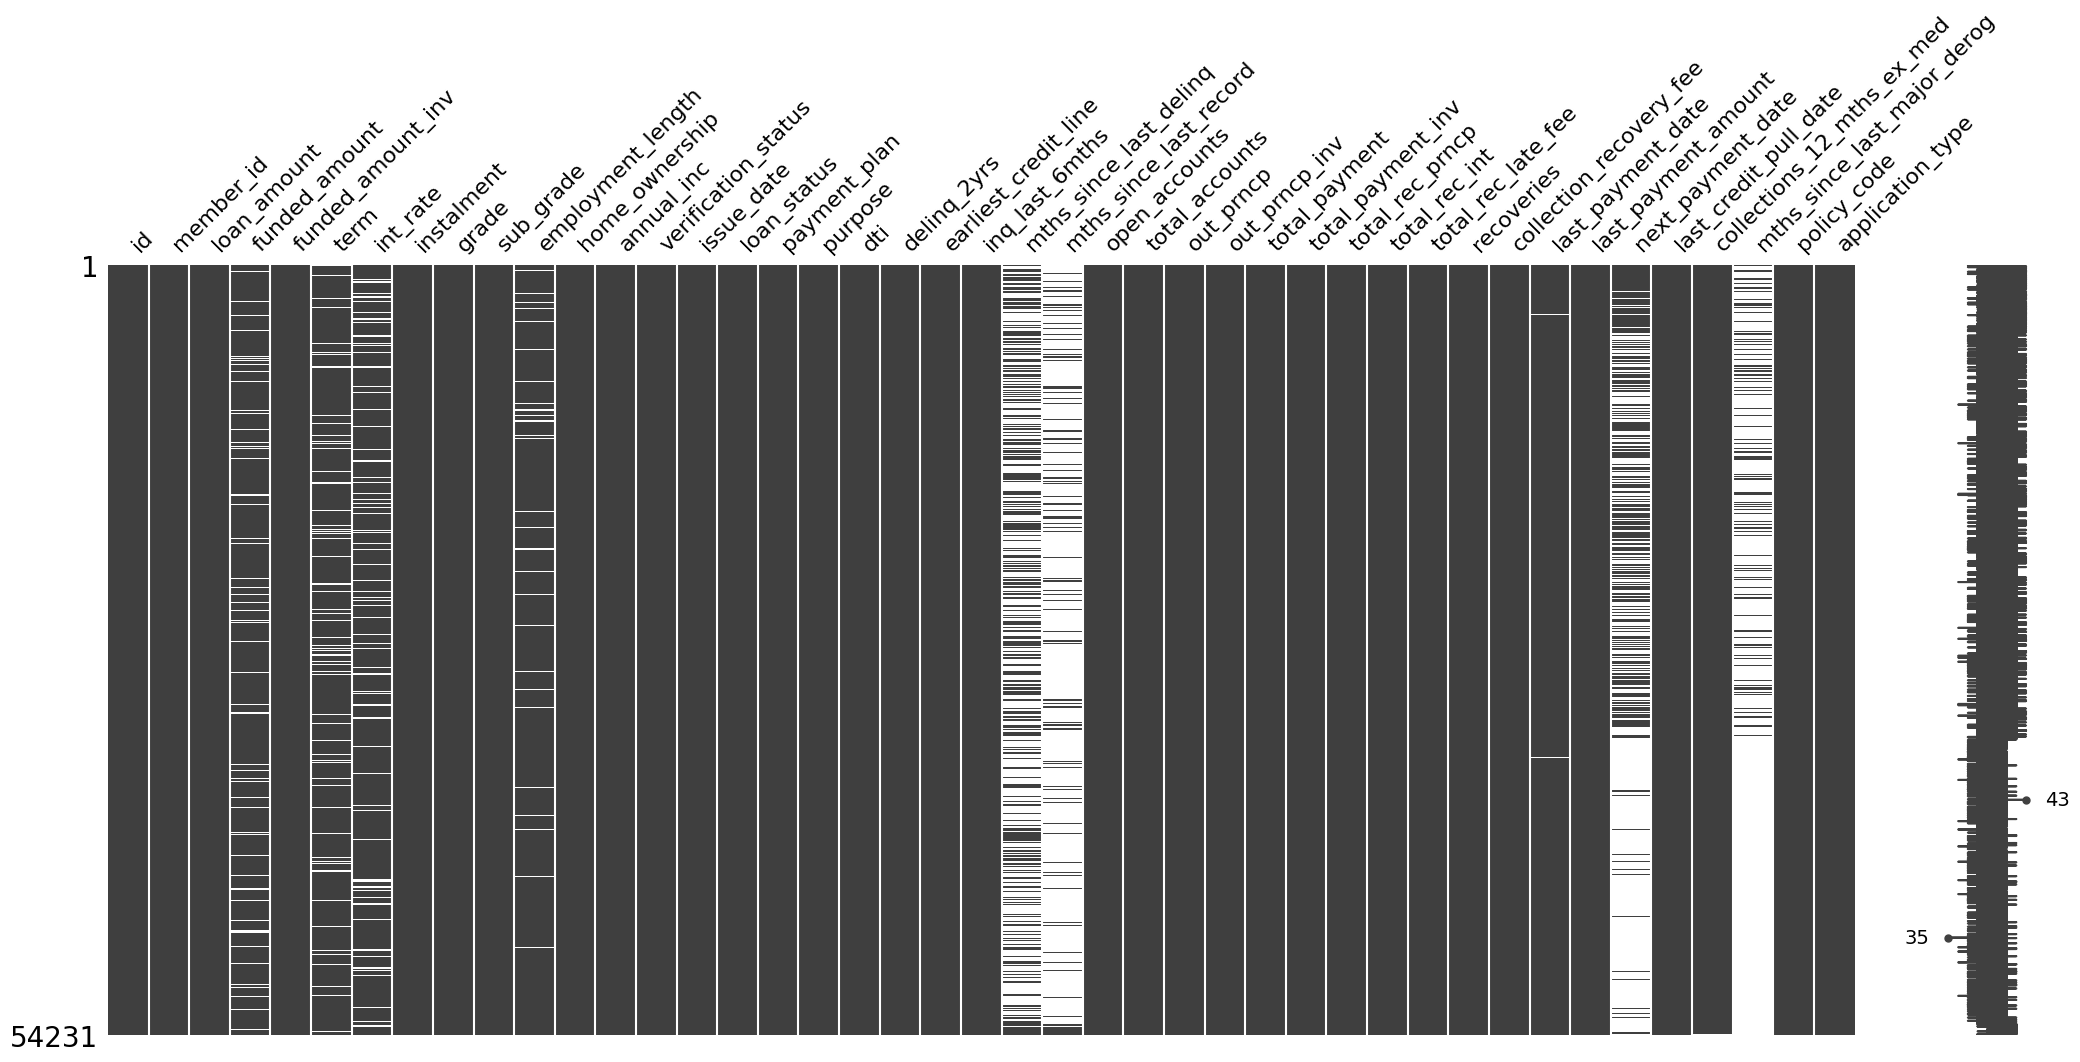

In [6]:
import missingno as msno

msno.matrix(modified_df)




Four categories had such a large % of null values (between 57-87%) that those columns were removed entirely from the dataframe, as shown below.

The funded_amount column was missing 3007 data points, equating to 5.54% of the values. These values are highly correlated to and typically identical values to the funded_amount_inv and loan_amount. Statistical analysis on these columns, shown earlier in this report, evidences this correlation.

Due to this high correlation, this column is essentially duplicate data, with some missing values, and does not provide meaningful additional information to the dataset, so it will be dropped.

In addition to this, one of the other two columns should also be removed when dropping overly correlated columns in task 6.

In [7]:
df_info = DataframeInfo(modified_df)

print(df_info.describe_columns())

from db_utils_local import DataFrameTransform

dftransformer = DataFrameTransform(modified_df)

dftransformer.delete_column('mths_since_last_delinq')
dftransformer.delete_column('mths_since_last_record')
dftransformer.delete_column('next_payment_date')
dftransformer.delete_column('mths_since_last_major_derog')
dftransformer.delete_column('funded_amount')

modified_df = dftransformer.return_dataframe()

df_info = DataframeInfo(modified_df)
print(df_info.count_percent_null())
print(df_info.describe_columns())


id                                      int64
member_id                               int64
loan_amount                           float64
funded_amount                         float64
funded_amount_inv                     float64
term                                    Int64
int_rate                              float64
instalment                            float64
grade                                category
sub_grade                            category
employment_length                    category
home_ownership                       category
annual_inc                            float64
verification_status                  category
issue_date                     datetime64[ns]
loan_status                          category
payment_plan                         category
purpose                              category
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6mths                    

Two columns contained very few null values, but these records were generally missing a variety of data, so the rows were removed, as shown below.

In [8]:
from db_utils_local import DataFrameTransform

dftransformer = DataFrameTransform(modified_df)

dftransformer.delete_row('last_payment_date')
dftransformer.delete_row('last_credit_pull_date')

modified_df = dftransformer.return_dataframe()

df_info = DataframeInfo(modified_df)
print(df_info.count_percent_null())
print(df_info.describe_columns())


                            Count Null  Percentage Null
id                                   0         0.000000
member_id                            0         0.000000
loan_amount                          0         0.000000
funded_amount_inv                    0         0.000000
term                              4766         8.801315
int_rate                          5161         9.530757
instalment                           0         0.000000
grade                                0         0.000000
sub_grade                            0         0.000000
employment_length                 2114         3.903898
home_ownership                       0         0.000000
annual_inc                           0         0.000000
verification_status                  0         0.000000
issue_date                           0         0.000000
loan_status                          0         0.000000
payment_plan                         0         0.000000
purpose                              0         0

The collections_12_mths_ex_med column is missing a very small amount of data (0.09%) and the vast majority (99.52%) of values within this columnn are zero, making the median and mode zero. The null values in this column were replaced with zero, as it was the median and mode value, and numerically close to the mean (0.0042). 

In [9]:
from db_utils_local import DataFrameTransform

dftransformer = DataFrameTransform(modified_df)

dftransformer.impute_median('collections_12_mths_ex_med')

modified_df = dftransformer.return_dataframe()

df_info = DataframeInfo(modified_df)
print(df_info.count_percent_null())
print(df_info.describe_columns())

                            Count Null  Percentage Null
id                                   0         0.000000
member_id                            0         0.000000
loan_amount                          0         0.000000
funded_amount_inv                    0         0.000000
term                              4766         8.801315
int_rate                          5161         9.530757
instalment                           0         0.000000
grade                                0         0.000000
sub_grade                            0         0.000000
employment_length                 2114         3.903898
home_ownership                       0         0.000000
annual_inc                           0         0.000000
verification_status                  0         0.000000
issue_date                           0         0.000000
loan_status                          0         0.000000
payment_plan                         0         0.000000
purpose                              0         0

c:\Users\clair\AiCore_Course\EDA Project\db_utils_local.py:134: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  median_impute = self.df[column_name].fillna(self.df[column_name].median(), inplace=True) # Replaces null value with median value


The employment_length column has 2118 null values, representing approxmately 3.9% of the dataset rows. The discrete probability distribution below, demonstrates that 10+ years is by far the most frequent category for employment_length, and assigning the small number of null values to this modal category will not add much to the already highly skewed nature of this category. 

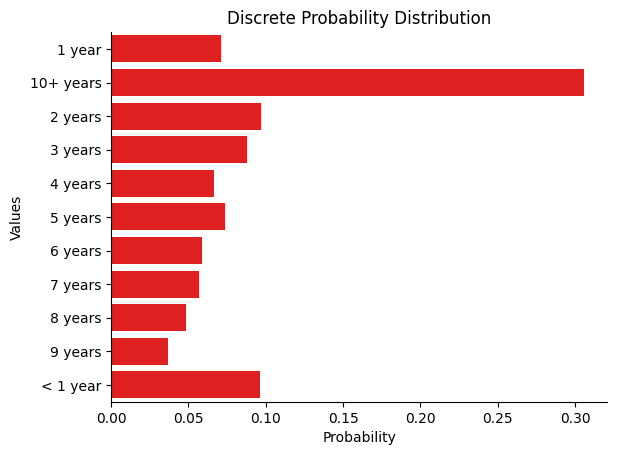

In [10]:
from db_utils_local import Plotter

dfplotter = Plotter(modified_df)

dfplotter.discrete_probability_distribution('employment_length')

So the employment_length null values are replaced with the modal category of 10+ years, as shown below.

In [11]:
from db_utils_local import DataFrameTransform

dftransformer = DataFrameTransform(modified_df)

dftransformer.impute_mode('employment_length')

modified_df = dftransformer.return_dataframe()

df_info = DataframeInfo(modified_df)
print(df_info.count_percent_null())

                            Count Null  Percentage Null
id                                   0         0.000000
member_id                            0         0.000000
loan_amount                          0         0.000000
funded_amount_inv                    0         0.000000
term                              4766         8.801315
int_rate                          5161         9.530757
instalment                           0         0.000000
grade                                0         0.000000
sub_grade                            0         0.000000
employment_length                    0         0.000000
home_ownership                       0         0.000000
annual_inc                           0         0.000000
verification_status                  0         0.000000
issue_date                           0         0.000000
loan_status                          0         0.000000
payment_plan                         0         0.000000
purpose                              0         0

c:\Users\clair\AiCore_Course\EDA Project\db_utils_local.py:138: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mode_impute = self.df[column_name].fillna(self.df[column_name].mode()[0], inplace=True) # Replaces null value with mode value


Reproducing the discrete probability distribution after the mode impute, shows a very similar result.

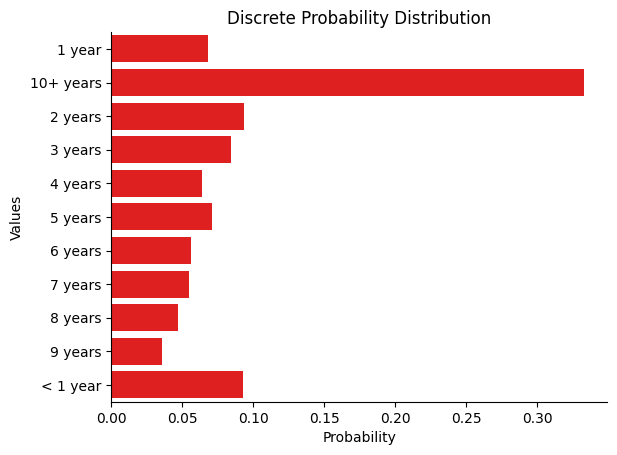

In [12]:
from db_utils_local import Plotter

dfplotter = Plotter(modified_df)

dfplotter.discrete_probability_distribution('employment_length')

In [13]:
# Group by 'Category' and calculate mean, median, and std dev
grouped = modified_df.groupby('sub_grade')['int_rate'].agg(['mean', 'median', 'std','max','min'])

# Display the result
print(grouped)

                mean  median       std    max    min
sub_grade                                           
A1          5.916654   6.030  0.335889   7.37   5.42
A2          6.549865   6.620  0.450687   7.68   5.79
A3          7.338374   7.620  0.453513   8.00   6.17
A4          7.785684   7.900  0.545158   9.32   6.54
A5          8.569729   8.900  0.634619   9.63   6.91
B1          9.776817   9.710  0.496137  11.14   6.00
B2         10.690841  10.990  0.493848  11.48   9.01
B3         11.465068  11.710  0.646449  11.99   9.33
B4         12.238768  12.420  0.846440  12.99   9.64
B5         12.637586  12.690  1.027472  13.67   6.00
C1         13.498925  13.680  0.842821  14.30   6.00
C2         14.068955  14.330  0.953648  15.10  10.59
C3         14.719312  15.220  1.022945  15.61   6.00
C4         15.334145  15.880  1.086108  16.20  11.22
C5         16.043528  16.780  1.258998  17.10  11.54
D1         16.647544  17.560  1.389584  17.76   6.00
D2         16.911867  17.570  1.590166  18.55 

C:\Users\clair\AppData\Local\Temp\ipykernel_6772\2532054989.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = modified_df.groupby('sub_grade')['int_rate'].agg(['mean', 'median', 'std','max','min'])


The columns int_rate and term are both missing a moderate number of values (9.53% and 8.8% respectively), which is too many values to just delete those rows but not enough rows to warrant removing the column. Also these are both likely to be very useful information when assessing the loan portfolio.

Methods were identified to impute appropriate values into both columns, however errors with this imputation arose when both fields were missing. Due to this problem, rows where both the int_rate and term were missing had to be removed. This was only a small number of rows (467), and meant that data integrity could be preserved for the remaining rows within the dataframe.

In [14]:
# Insert code to remove the row when both int_rate and term are null.
from db_utils_local import DataFrameTransform

dftransformer = DataFrameTransform(modified_df)

dftransformer.delete_row_if_both_null('int_rate', 'term')

modified_df = dftransformer.return_dataframe()

df_info = DataframeInfo(modified_df)
print(df_info.count_percent_null())
print(df_info.describe_columns())

                            Count Null  Percentage Null
id                                   0         0.000000
member_id                            0         0.000000
loan_amount                          0         0.000000
funded_amount_inv                    0         0.000000
term                              4299         8.007973
int_rate                          4694         8.743760
instalment                           0         0.000000
grade                                0         0.000000
sub_grade                            0         0.000000
employment_length                    0         0.000000
home_ownership                       0         0.000000
annual_inc                           0         0.000000
verification_status                  0         0.000000
issue_date                           0         0.000000
loan_status                          0         0.000000
payment_plan                         0         0.000000
purpose                              0         0

When the dataframe is organised by sub_grade, the int_rate groups together in sections where all loans in a particular time period are given a specific rate. The loan raate changes over time for each sub grade of loan, but it is reasonable to impute the interest rate of the loan below when this is missing from the data. The vast majority of these imputations will be correct, as the missing value is between two identical rates. Very occasionally the row above and below the missing value are different, although generally by only a few tenths of a percent, and this will mean that the imputed int_rate could be inaccurate.

In [15]:
from db_utils_local import DataFrameTransform

dftransformer = DataFrameTransform(modified_df)

dftransformer.impute_previous_row_value('sub_grade','int_rate')

modified_df = dftransformer.return_dataframe()

df_info = DataframeInfo(modified_df)
print(df_info.count_percent_null())
print(df_info.describe_columns())




                            Count Null  Percentage Null
id                                   0         0.000000
member_id                            0         0.000000
loan_amount                          0         0.000000
funded_amount_inv                    0         0.000000
term                              4299         8.007973
int_rate                             0         0.000000
instalment                           0         0.000000
grade                                0         0.000000
sub_grade                            0         0.000000
employment_length                    0         0.000000
home_ownership                       0         0.000000
annual_inc                           0         0.000000
verification_status                  0         0.000000
issue_date                           0         0.000000
loan_status                          0         0.000000
payment_plan                         0         0.000000
purpose                              0         0

The term of the loan can be calculated from the loan amount (loan_amount), interest rate (int_rate) and monthly payments (instalment). Using this formula did cause some problems at first, as there were 6 rows within the dataframe that this method would not work for. Closer inspection of these errors, which were printed out and the skipped over, led to the realisation that they all contain some form of data entry error made during the creation of these entries into the dataframe.

In [16]:
from db_utils_local import DataFrameTransform

dftransformer = DataFrameTransform(modified_df)

dftransformer.impute_term('term', 'loan_amount', 'int_rate', 'instalment')

modified_df = dftransformer.return_dataframe()

df_info = DataframeInfo(modified_df)
print(df_info.count_percent_null())


1049553
math domain error
35000.0
0.1991
573.18
791421
math domain error
30000.0
0.20989999999999998
497.01
754045
math domain error
35000.0
0.20620000000000002
577.74
616162
math domain error
14000.0
0.0654
47.54
339569
math domain error
9850.0
0.1482
79.53
316948
math domain error
16000.0
0.1324
83.68
                            Count Null  Percentage Null
id                                   0         0.000000
member_id                            0         0.000000
loan_amount                          0         0.000000
funded_amount_inv                    0         0.000000
term                                 6         0.011177
int_rate                             0         0.000000
instalment                           0         0.000000
grade                                0         0.000000
sub_grade                            0         0.000000
employment_length                    0         0.000000
home_ownership                       0         0.000000
annual_inc             

Now we will remove each of those 6 individual rows using the unique id. These are data entry errors in the initial database, and the values cannot be used to calulate the term of the loan as one or more of the other values in the formula is incorrect.

In [17]:
from db_utils_local import DataFrameTransform

dftransformer = DataFrameTransform(modified_df)

dftransformer.delete_row_using_id(1049553)
dftransformer.delete_row_using_id(791421)
dftransformer.delete_row_using_id(754045)
dftransformer.delete_row_using_id(616162)
dftransformer.delete_row_using_id(339569)
dftransformer.delete_row_using_id(316948)

modified_df = dftransformer.return_dataframe()

df_info = DataframeInfo(modified_df)
print(df_info.count_percent_null())


                            Count Null  Percentage Null
id                                   0              0.0
member_id                            0              0.0
loan_amount                          0              0.0
funded_amount_inv                    0              0.0
term                                 0              0.0
int_rate                             0              0.0
instalment                           0              0.0
grade                                0              0.0
sub_grade                            0              0.0
employment_length                    0              0.0
home_ownership                       0              0.0
annual_inc                           0              0.0
verification_status                  0              0.0
issue_date                           0              0.0
loan_status                          0              0.0
payment_plan                         0              0.0
purpose                              0          

After the imputing functions, some of the datatypes have been changed therefore we need to change them back as below

In [18]:
from db_utils_local import DataTransform

transformer = DataTransform(modified_df)

transformer.convert_obj_to_int('term')
transformer.convert_column_to_category('application_type')
transformer.convert_column_to_category('grade')
transformer.convert_column_to_category('sub_grade')
transformer.convert_column_to_category('employment_length')
transformer.convert_column_to_category('home_ownership')
transformer.convert_column_to_category('verification_status')
transformer.convert_column_to_category('loan_status')
transformer.convert_column_to_category('payment_plan')
transformer.convert_column_to_category('purpose')
transformer.convert_column_to_datetime('earliest_credit_line')
transformer.convert_column_to_category('application_type')

modified_df = transformer.return_dataframe()



At the start of this section, the null values were visualised using missingno, which produces a whitespace type chart showing gaps within the dataframe. The missingno chart is now reproduced to show that all null values have been removed.

To assist with Milestone 4 a csv of the mddified_df will be saved as mod_loan_payments_pre_skew.csv

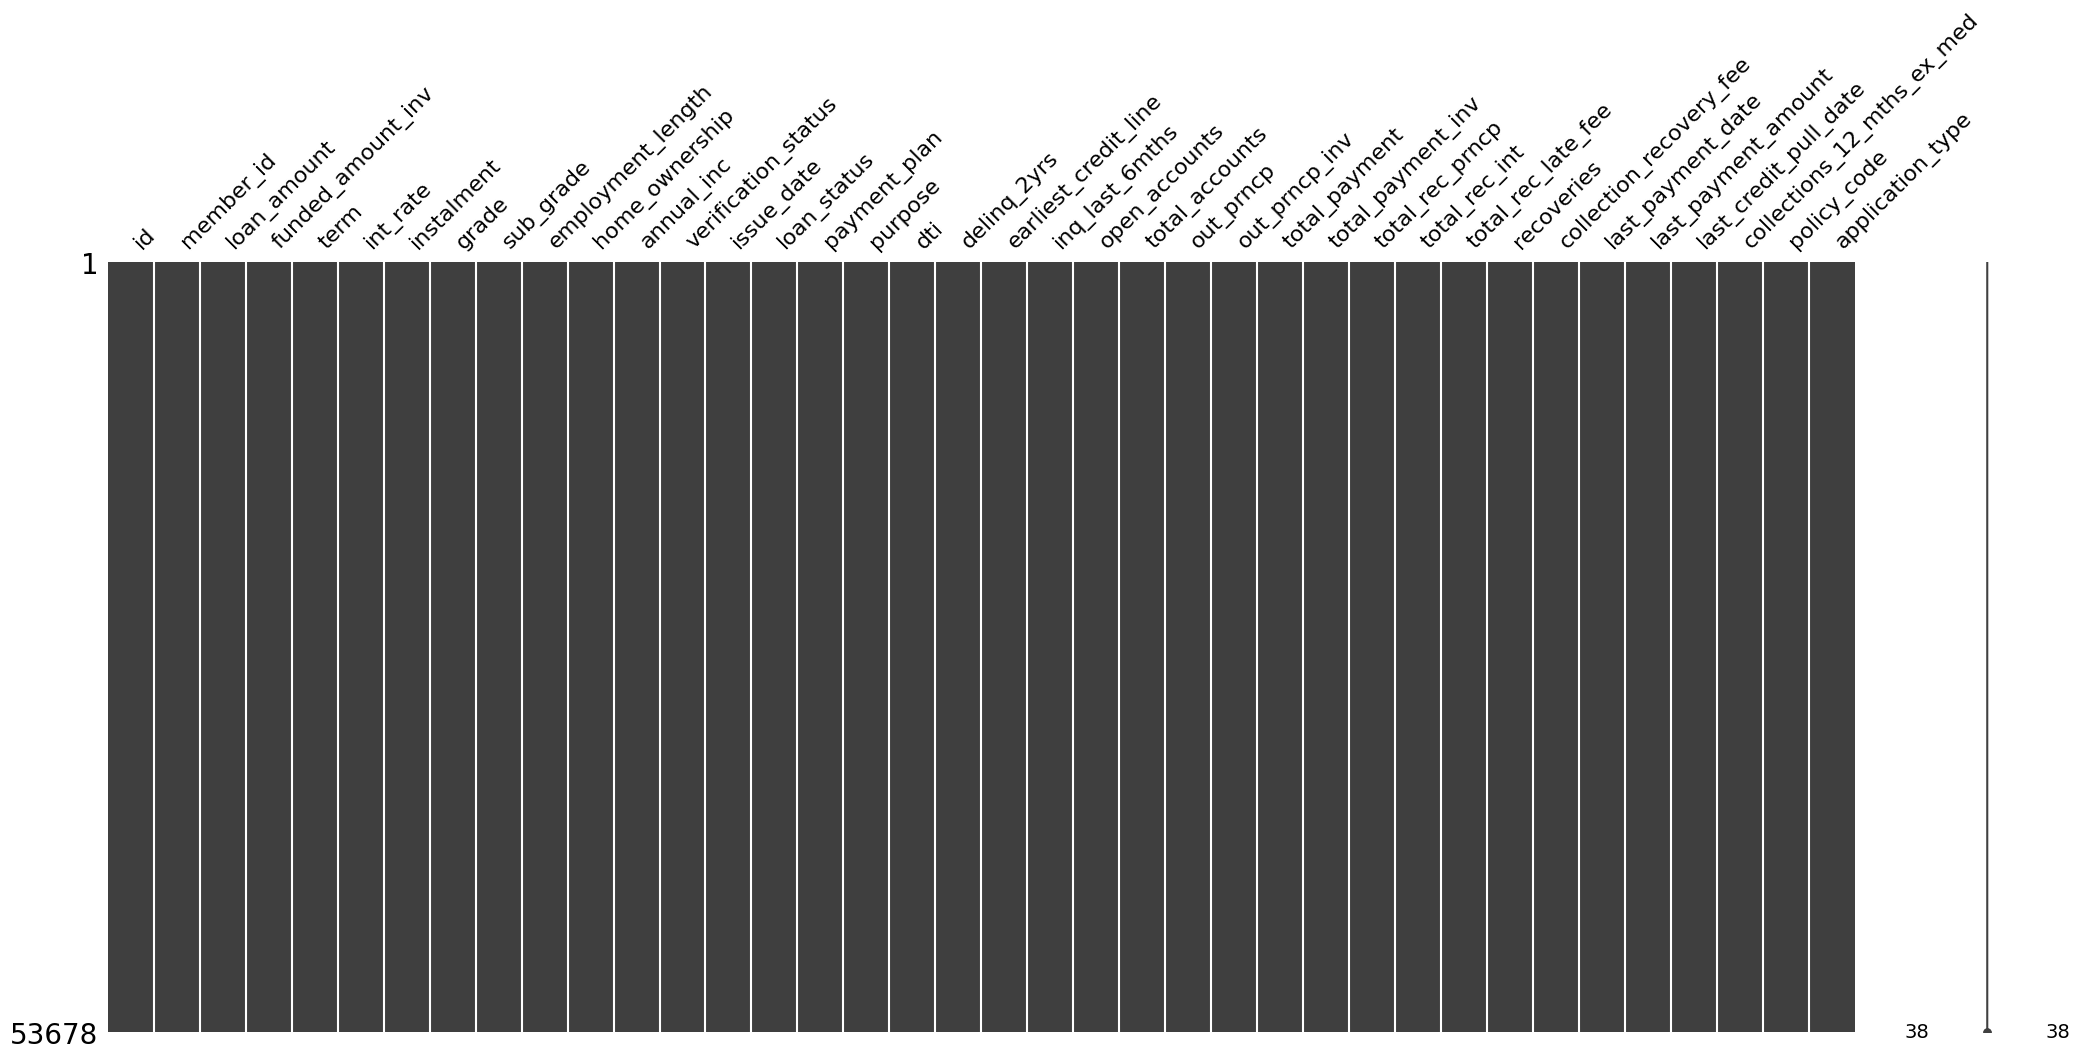

In [19]:
import missingno as msno

msno.matrix(modified_df)

modified_df.to_csv('mod_loan_payments_pre_skew.csv', index=False)

### Skewed Data in Dataset

Skewed data can lead to biased models and inaccurate results, so it's important to address this issue before proceeding with any analysis.

The skew of each numeric column is listed below.

In [20]:
df_info = DataframeInfo(modified_df)
print(df_info.analyze_skew())


id                             2.369068
member_id                      2.204345
loan_amount                    0.804710
funded_amount_inv              0.813671
term                           1.955747
int_rate                       0.413097
instalment                     0.997088
annual_inc                     8.760052
dti                            0.189554
delinq_2yrs                    5.389099
inq_last_6mths                 3.259813
open_accounts                  1.060080
total_accounts                 0.779404
out_prncp                      2.355164
out_prncp_inv                  2.355587
total_payment                  1.271102
total_payment_inv              1.259468
total_rec_prncp                1.262659
total_rec_int                  2.204944
total_rec_late_fee            13.163901
recoveries                    14.414476
collection_recovery_fee       27.795372
last_payment_amount            2.496532
collections_12_mths_ex_med    20.278761
policy_code                    0.000000


The numeric analysis of skew shows positive skew only, on all data columns except the policy_code which is a single value common to all entries. To show the skew in a visual way, histograms and QQplots will now be produced for each data column in the dataframe.

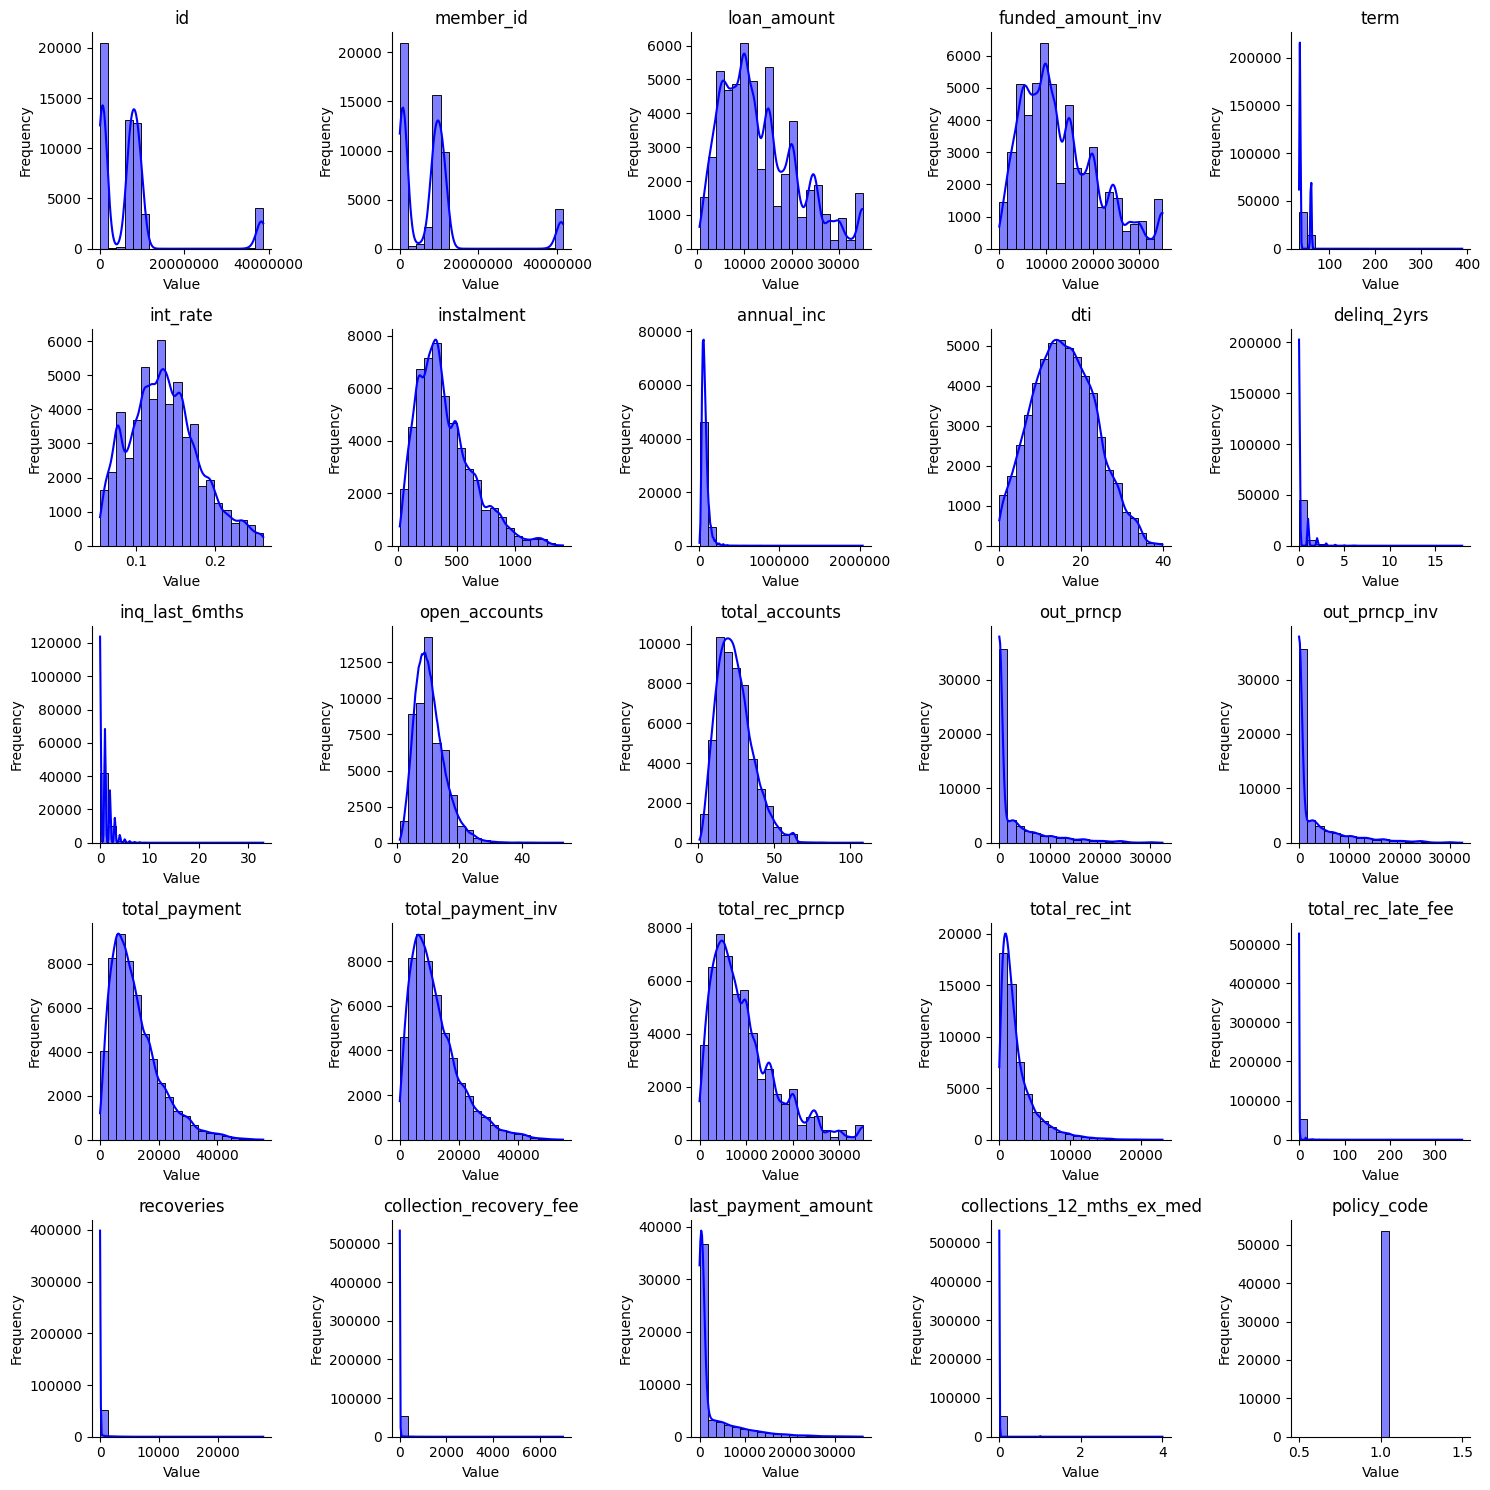

None


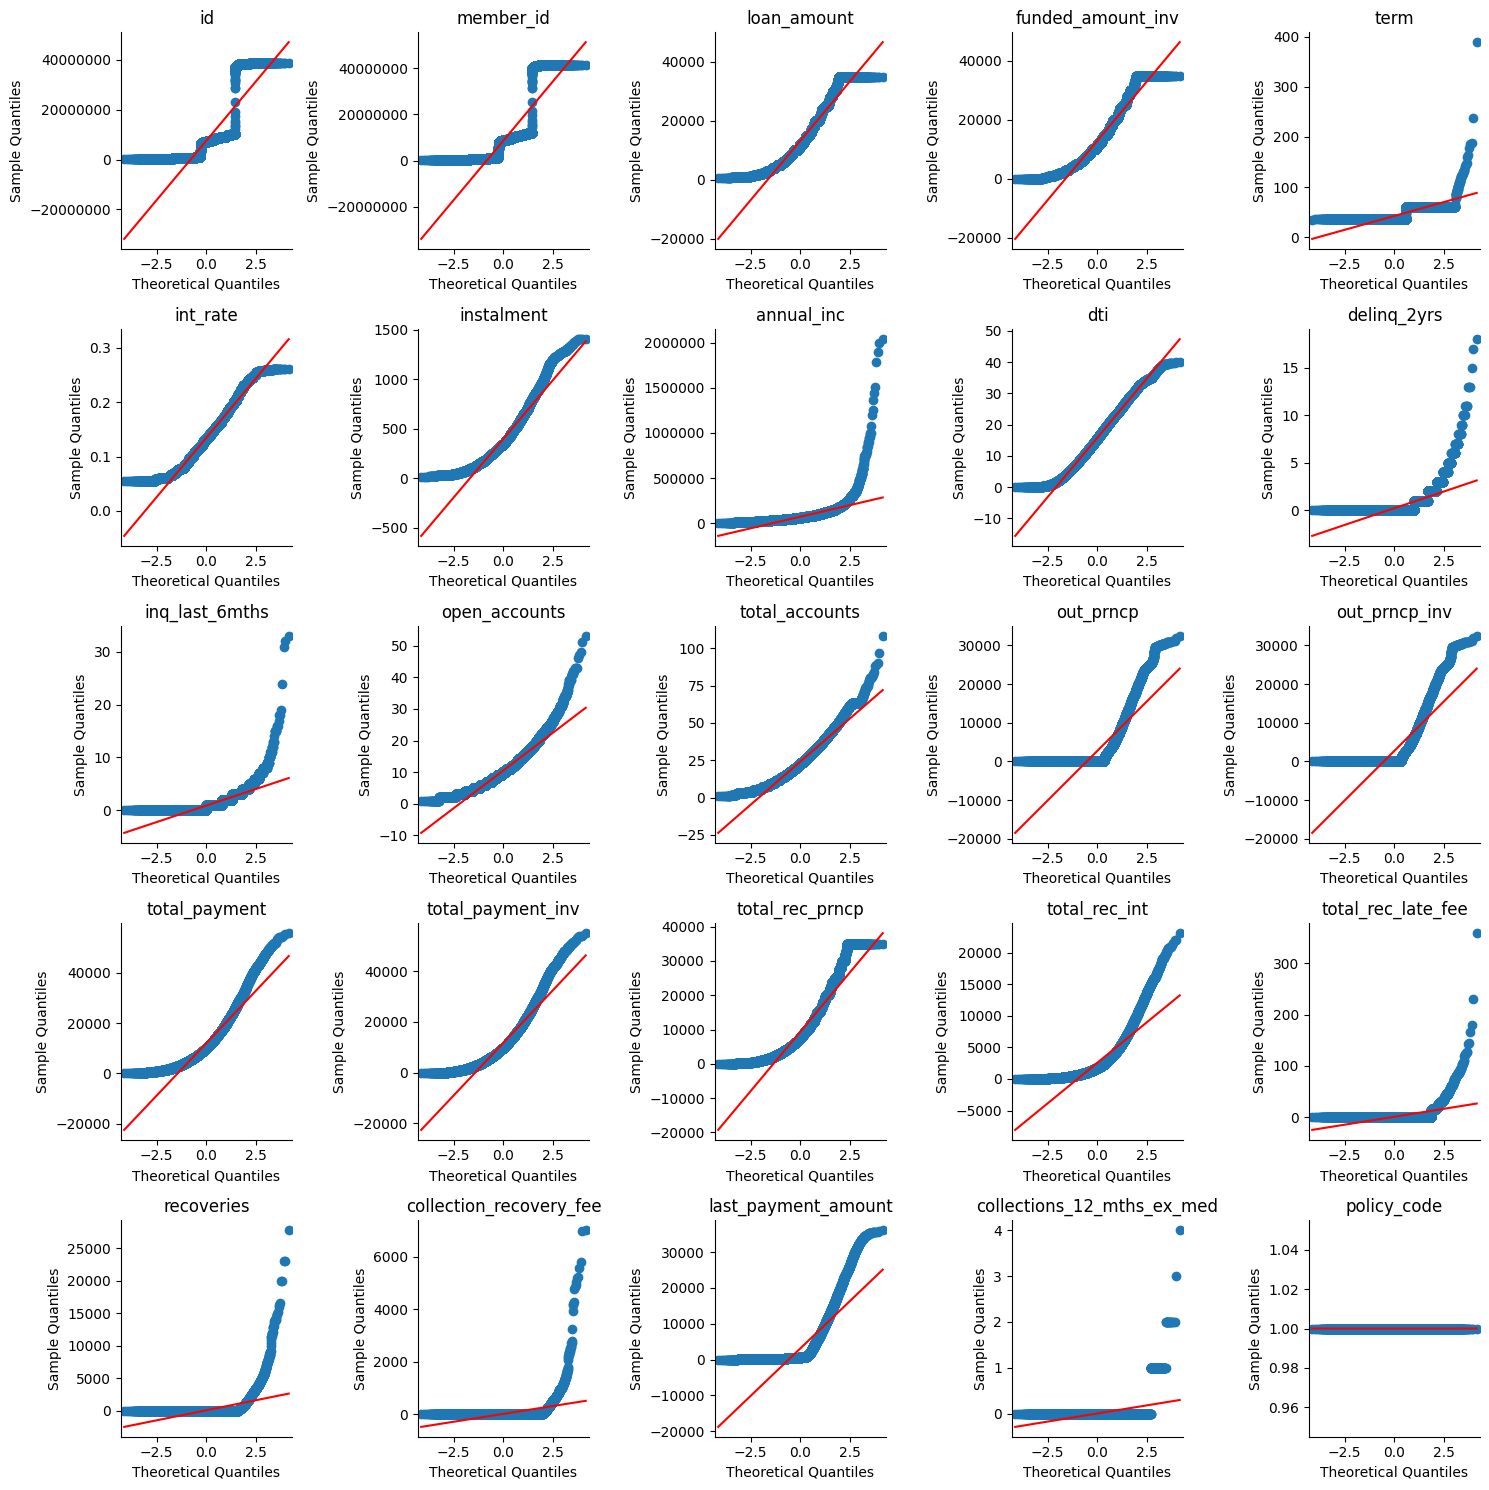

None


In [21]:
print(Plotter(modified_df).histogram_df_columns())
print(Plotter(modified_df).qqplot_df_columns())

Analysing the above graphs and figures it is clear that 'id' and 'member_id' should not be corrected for Skew as they are index fields.

Setting a threshold for the skew of between -0.5 and 0.5 means that 'int_rate' is very symmetric and does not require correction.

Some of the other fields are not not suitable for skew transformation as they contain a large number of 0 values and are therefore not a fully randomn distribution. The list of fields below details the analsyis. 
| Column                     | Action                      |
| -------------------------- | --------------------------- |
| id                         | index field                 |
| member_id                  | index field                 |
| loan_amount                | To Transform                |
| funded_amount_inv          |  To Transform               |
| term                       | To Transform                |
| int_rate                   | Symmetric                   |
| instalment                 | To Transform                |
| annual_inc                 | To Transform                |
| dti                        | To Transform                |
| delinq_2yrs                | High number of zero values  |
| inq_last_6mths             | High number of zero values  |
| open_accounts              | To Transform                |
| total_accounts             |  To Transform               |
| out_prncp                  | High number of zero values  |
| out_prncp_inv              |  High number of zero values |
| total_payment              | To Transform                |
| total_payment_inv          |  To Transform               |
| total_rec_prncp            | To Transform                |
| total_rec_int              | To Transform                |
| total_rec_late_fee         | High number of zero values  |
| recoveries                 | High number of zero values  |
| collection_recovery_fee    | High number of zero values  |
| last_payment_amount        | High number of zero values  |
| collections_12_mths_ex_med | High number of zero values  |
| policy_code                | One value                   |







The following code takes the 'To transform' columns and looks at the three different skew transformations to see which will be the most effective, given the principle of simpliest transformation possible if results are close.

In [22]:
from db_utils_local import DataframeInfo

columns_to_analyse = ['loan_amount','funded_amount_inv', 'instalment','dti' ,'inq_last_6mths','open_accounts' ,'annual_inc','total_accounts','total_payment' ,'total_payment_inv','total_rec_prncp','total_rec_int' ]

df_info = DataframeInfo(modified_df)
print(df_info.analyze_skew_methods(columns_to_analyse))

               Column  Original Skewness  Box-Cox Skewness  Log Skewness  \
0         loan_amount           0.804688         -0.043103     -0.677946   
1   funded_amount_inv           0.813648               NaN           NaN   
2          instalment           0.997060         -0.020667     -0.656491   
3                 dti           0.189549               NaN           NaN   
4      inq_last_6mths           3.259722               NaN           NaN   
5       open_accounts           1.060050          0.006417     -0.276543   
6          annual_inc           8.759807         -0.012189      0.141431   
7      total_accounts           0.779383         -0.012531     -0.556462   
8       total_payment           1.271066         -0.013657     -0.751643   
9   total_payment_inv           1.259432               NaN           NaN   
10    total_rec_prncp           1.262623               NaN           NaN   
11      total_rec_int           2.204882          0.001734     -0.554111   

    Yeo-Joh

The results of the analysis are below

| Column            | Action      |
| ----------------- | ----------- |
| loan_amount       | Box-Cox     |
| funded_amount_inv | Yeo-Johnson |
| instalment        | Box-Cox     |
| dti               | Yeo-Johnson |
| inq_last_6mths    | Yeo-Johnson |
| open_accounts     | Yeo-Johnson |
| annual_inc        | Box-Cox     |
| total_accounts    | Box-Cox     |
| total_payment     | Box-Cox     |
| total_payment_inv | Yeo-Johnson |
| total_rec_prncp   | Yeo-Johnson |
| total_rec_int     | Box-Cox     |

Apply the required transformations

In [23]:
from db_utils_local import DataFrameTransform

dftransformer = DataFrameTransform(modified_df)

dftransformer.apply_box_cox('loan_amount')
dftransformer.apply_box_cox('instalment')
dftransformer.apply_box_cox('annual_inc')
dftransformer.apply_box_cox('total_accounts')
dftransformer.apply_box_cox('total_payment')
dftransformer.apply_box_cox('total_rec_int')
dftransformer.apply_yeo_johnson('funded_amount_inv')
dftransformer.apply_yeo_johnson('dti')
dftransformer.apply_yeo_johnson('inq_last_6mths')
dftransformer.apply_yeo_johnson('open_accounts')
dftransformer.apply_yeo_johnson('total_payment_inv')
dftransformer.apply_yeo_johnson('total_rec_prncp')

modified_df = dftransformer.df



Display distributions to show change in skew in transformed columns and then export to a csv

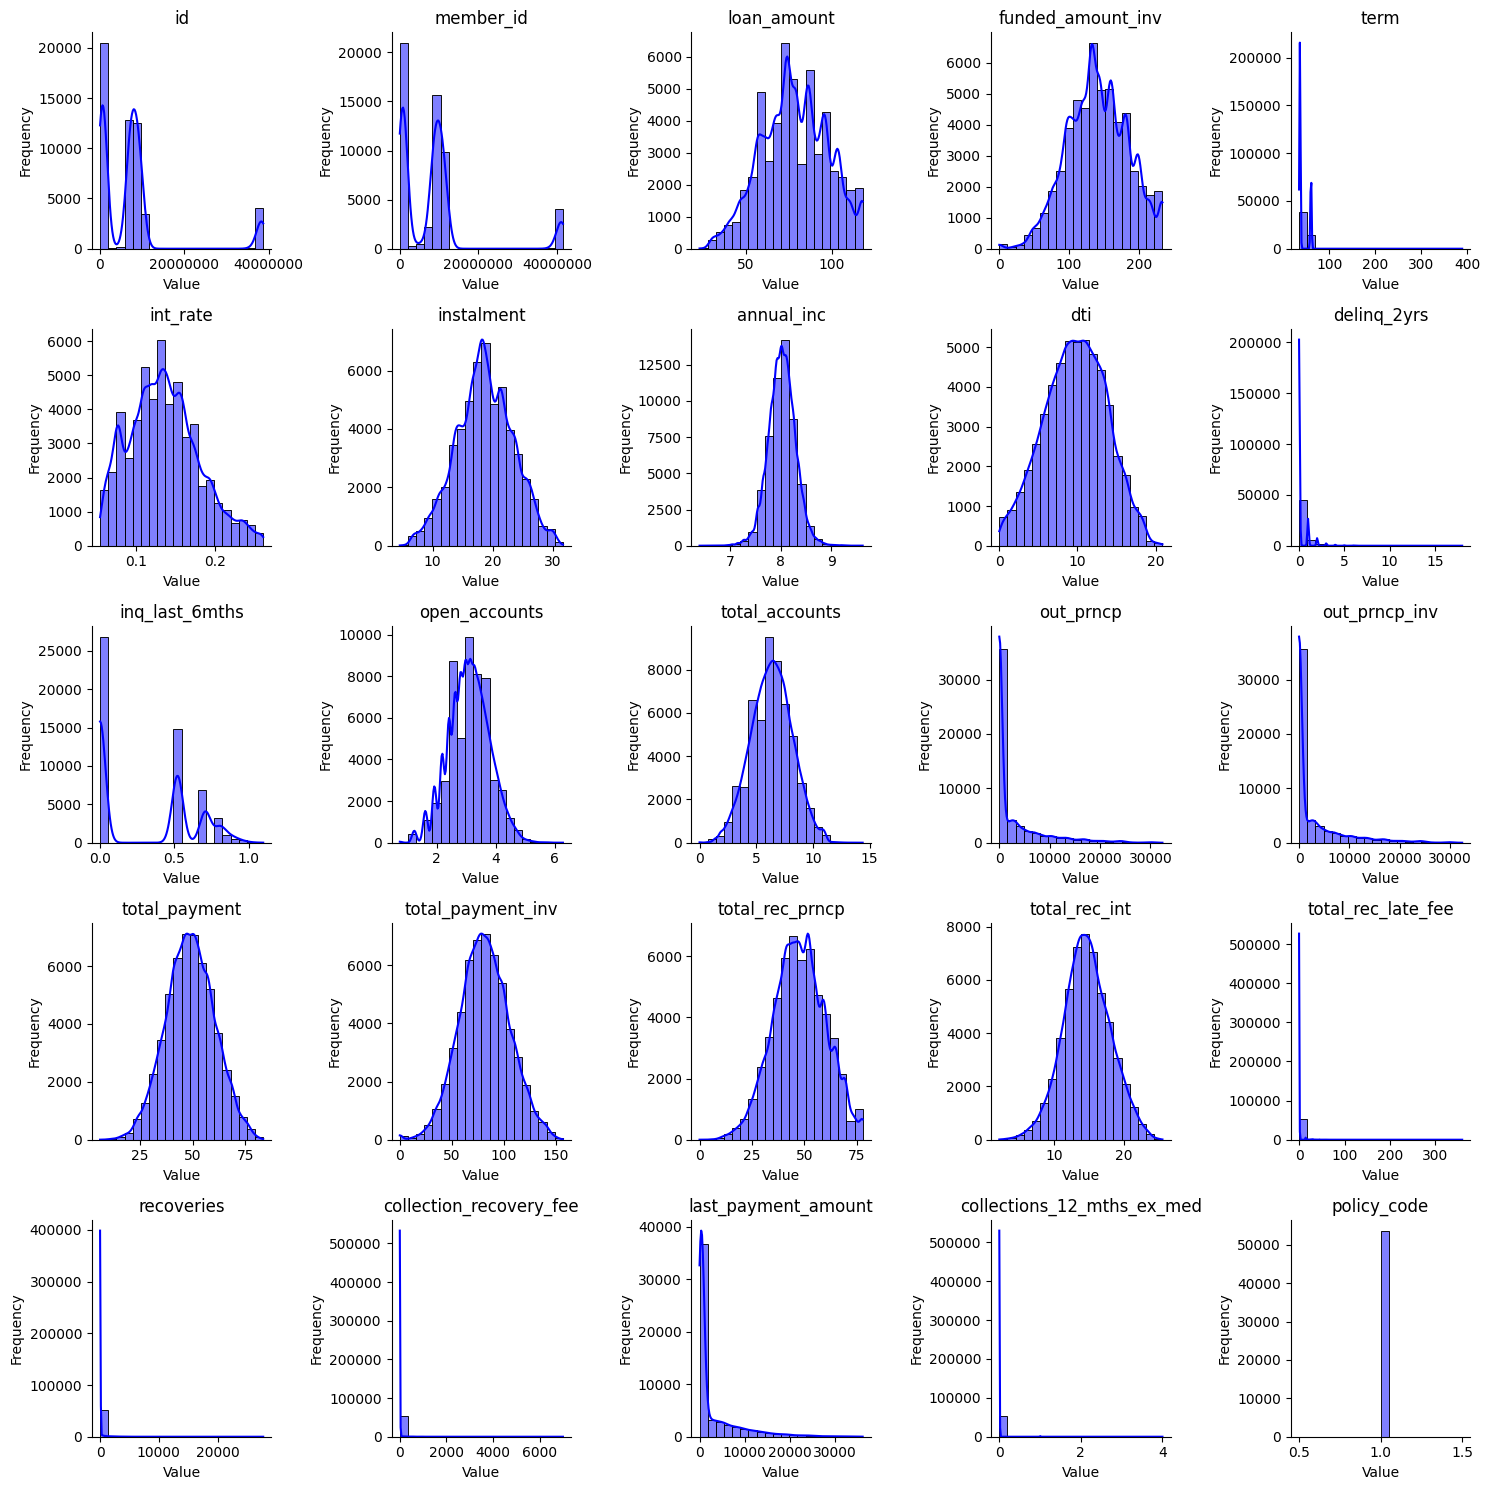

None


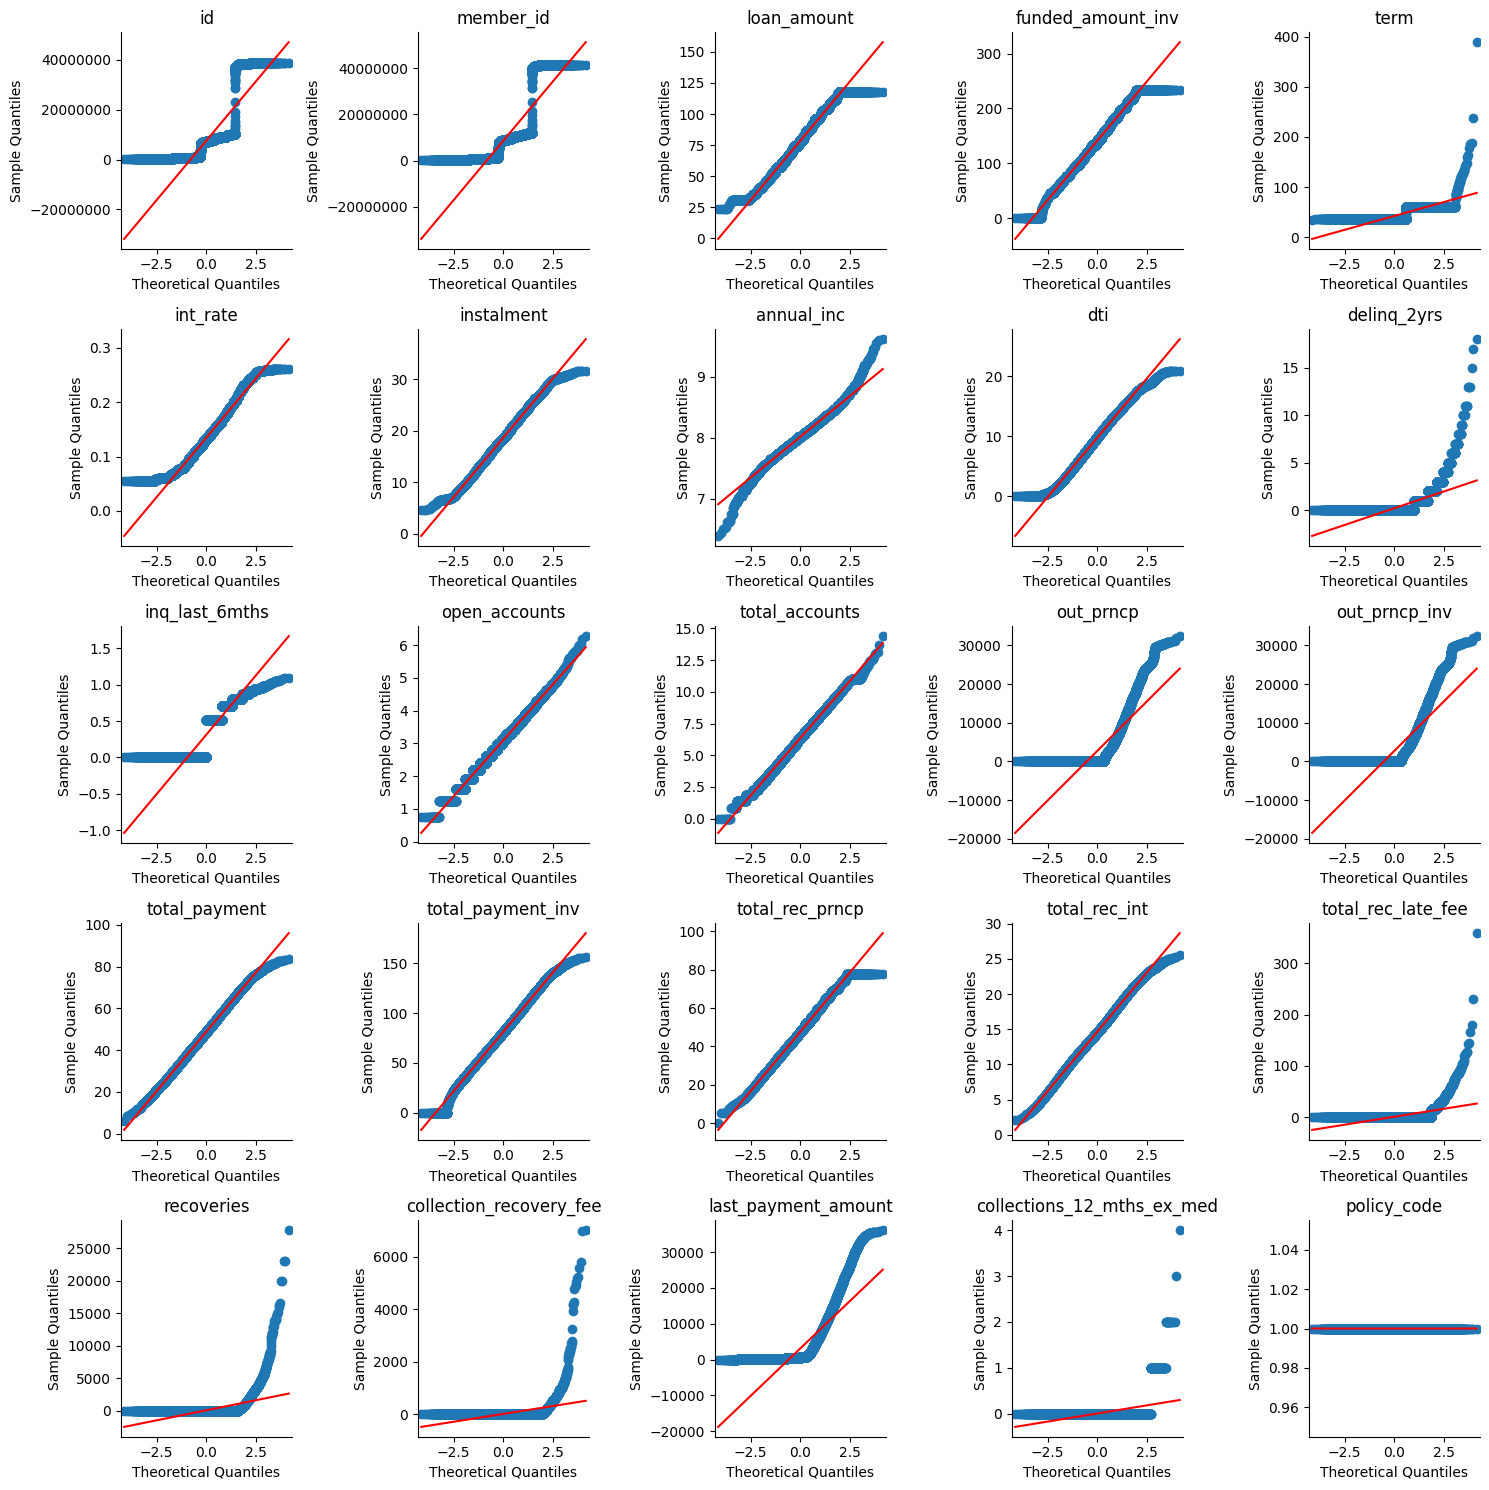

None


In [24]:
print(Plotter(modified_df).histogram_df_columns())
print(Plotter(modified_df).qqplot_df_columns())

#modified_df.to_csv('modified_loan_payments.csv', index=False)

### Removing Outliers

Use boxplots to show the outliers for each column of continuous data 

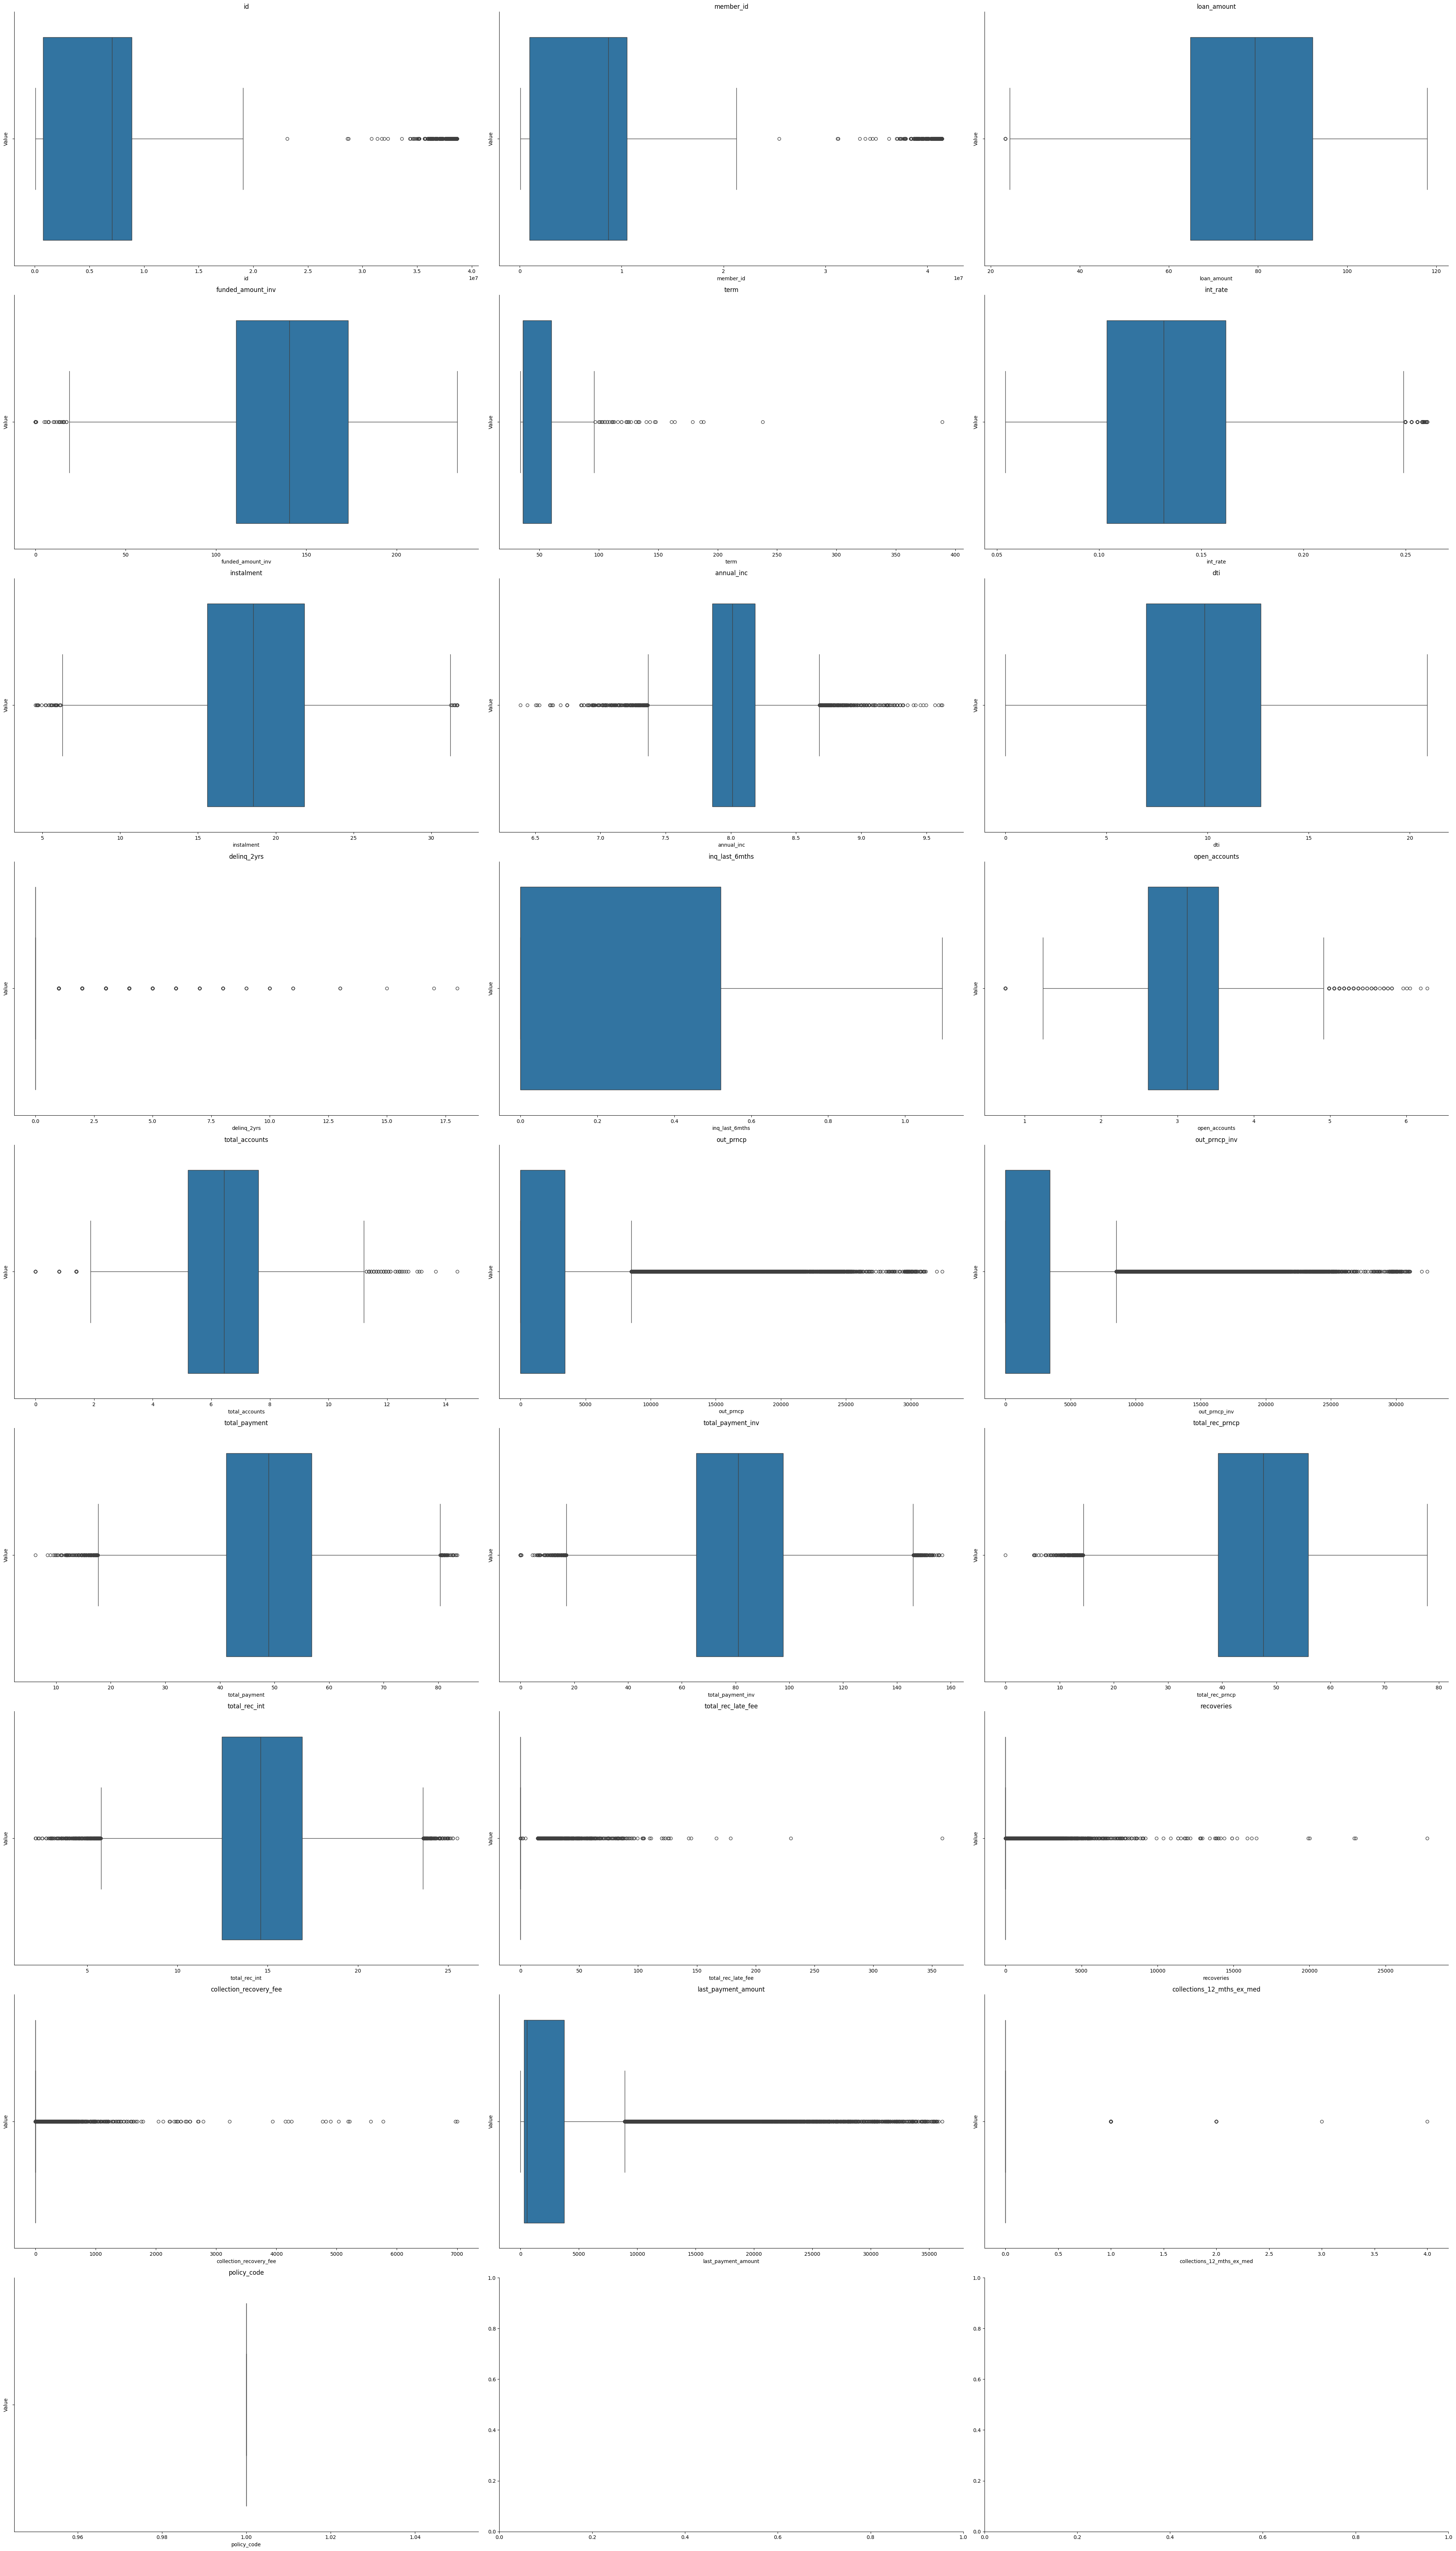

None


In [25]:
# code for boxplots
from db_utils_local import Plotter

dfplotter = Plotter(modified_df)

print(Plotter(modified_df).boxplot_with_scatter())


From visual analysis of the box plots, it can be seen that many of the plots still have outliers after the skew adjustments. I have chosen to remove the outliers using a Interquartile Range Method. Not all of the fields have had their outliers removed, in particular those with many zero values as the data in the 'outlier' region is valuable.

In [26]:
from db_utils_local import DataFrameTransform

# Load DataFrameTransform as a new dataframe
dftransformer = DataFrameTransform(modified_df)

# Remove outliers from the chosen column

dftransformer.remove_outliers_IQR('term')
dftransformer.remove_outliers_IQR('int_rate')
dftransformer.remove_outliers_IQR('instalment')
dftransformer.remove_outliers_IQR('annual_inc')
dftransformer.remove_outliers_IQR('open_accounts')
dftransformer.remove_outliers_IQR('total_accounts')
dftransformer.remove_outliers_IQR('total_payment')
dftransformer.remove_outliers_IQR('total_payment_inv')
dftransformer.remove_outliers_IQR('total_rec_prncp')
dftransformer.remove_outliers_IQR('total_rec_int')


# Update modified_df
modified_df = dftransformer.df

Print the box plots again to see the change in the outliers

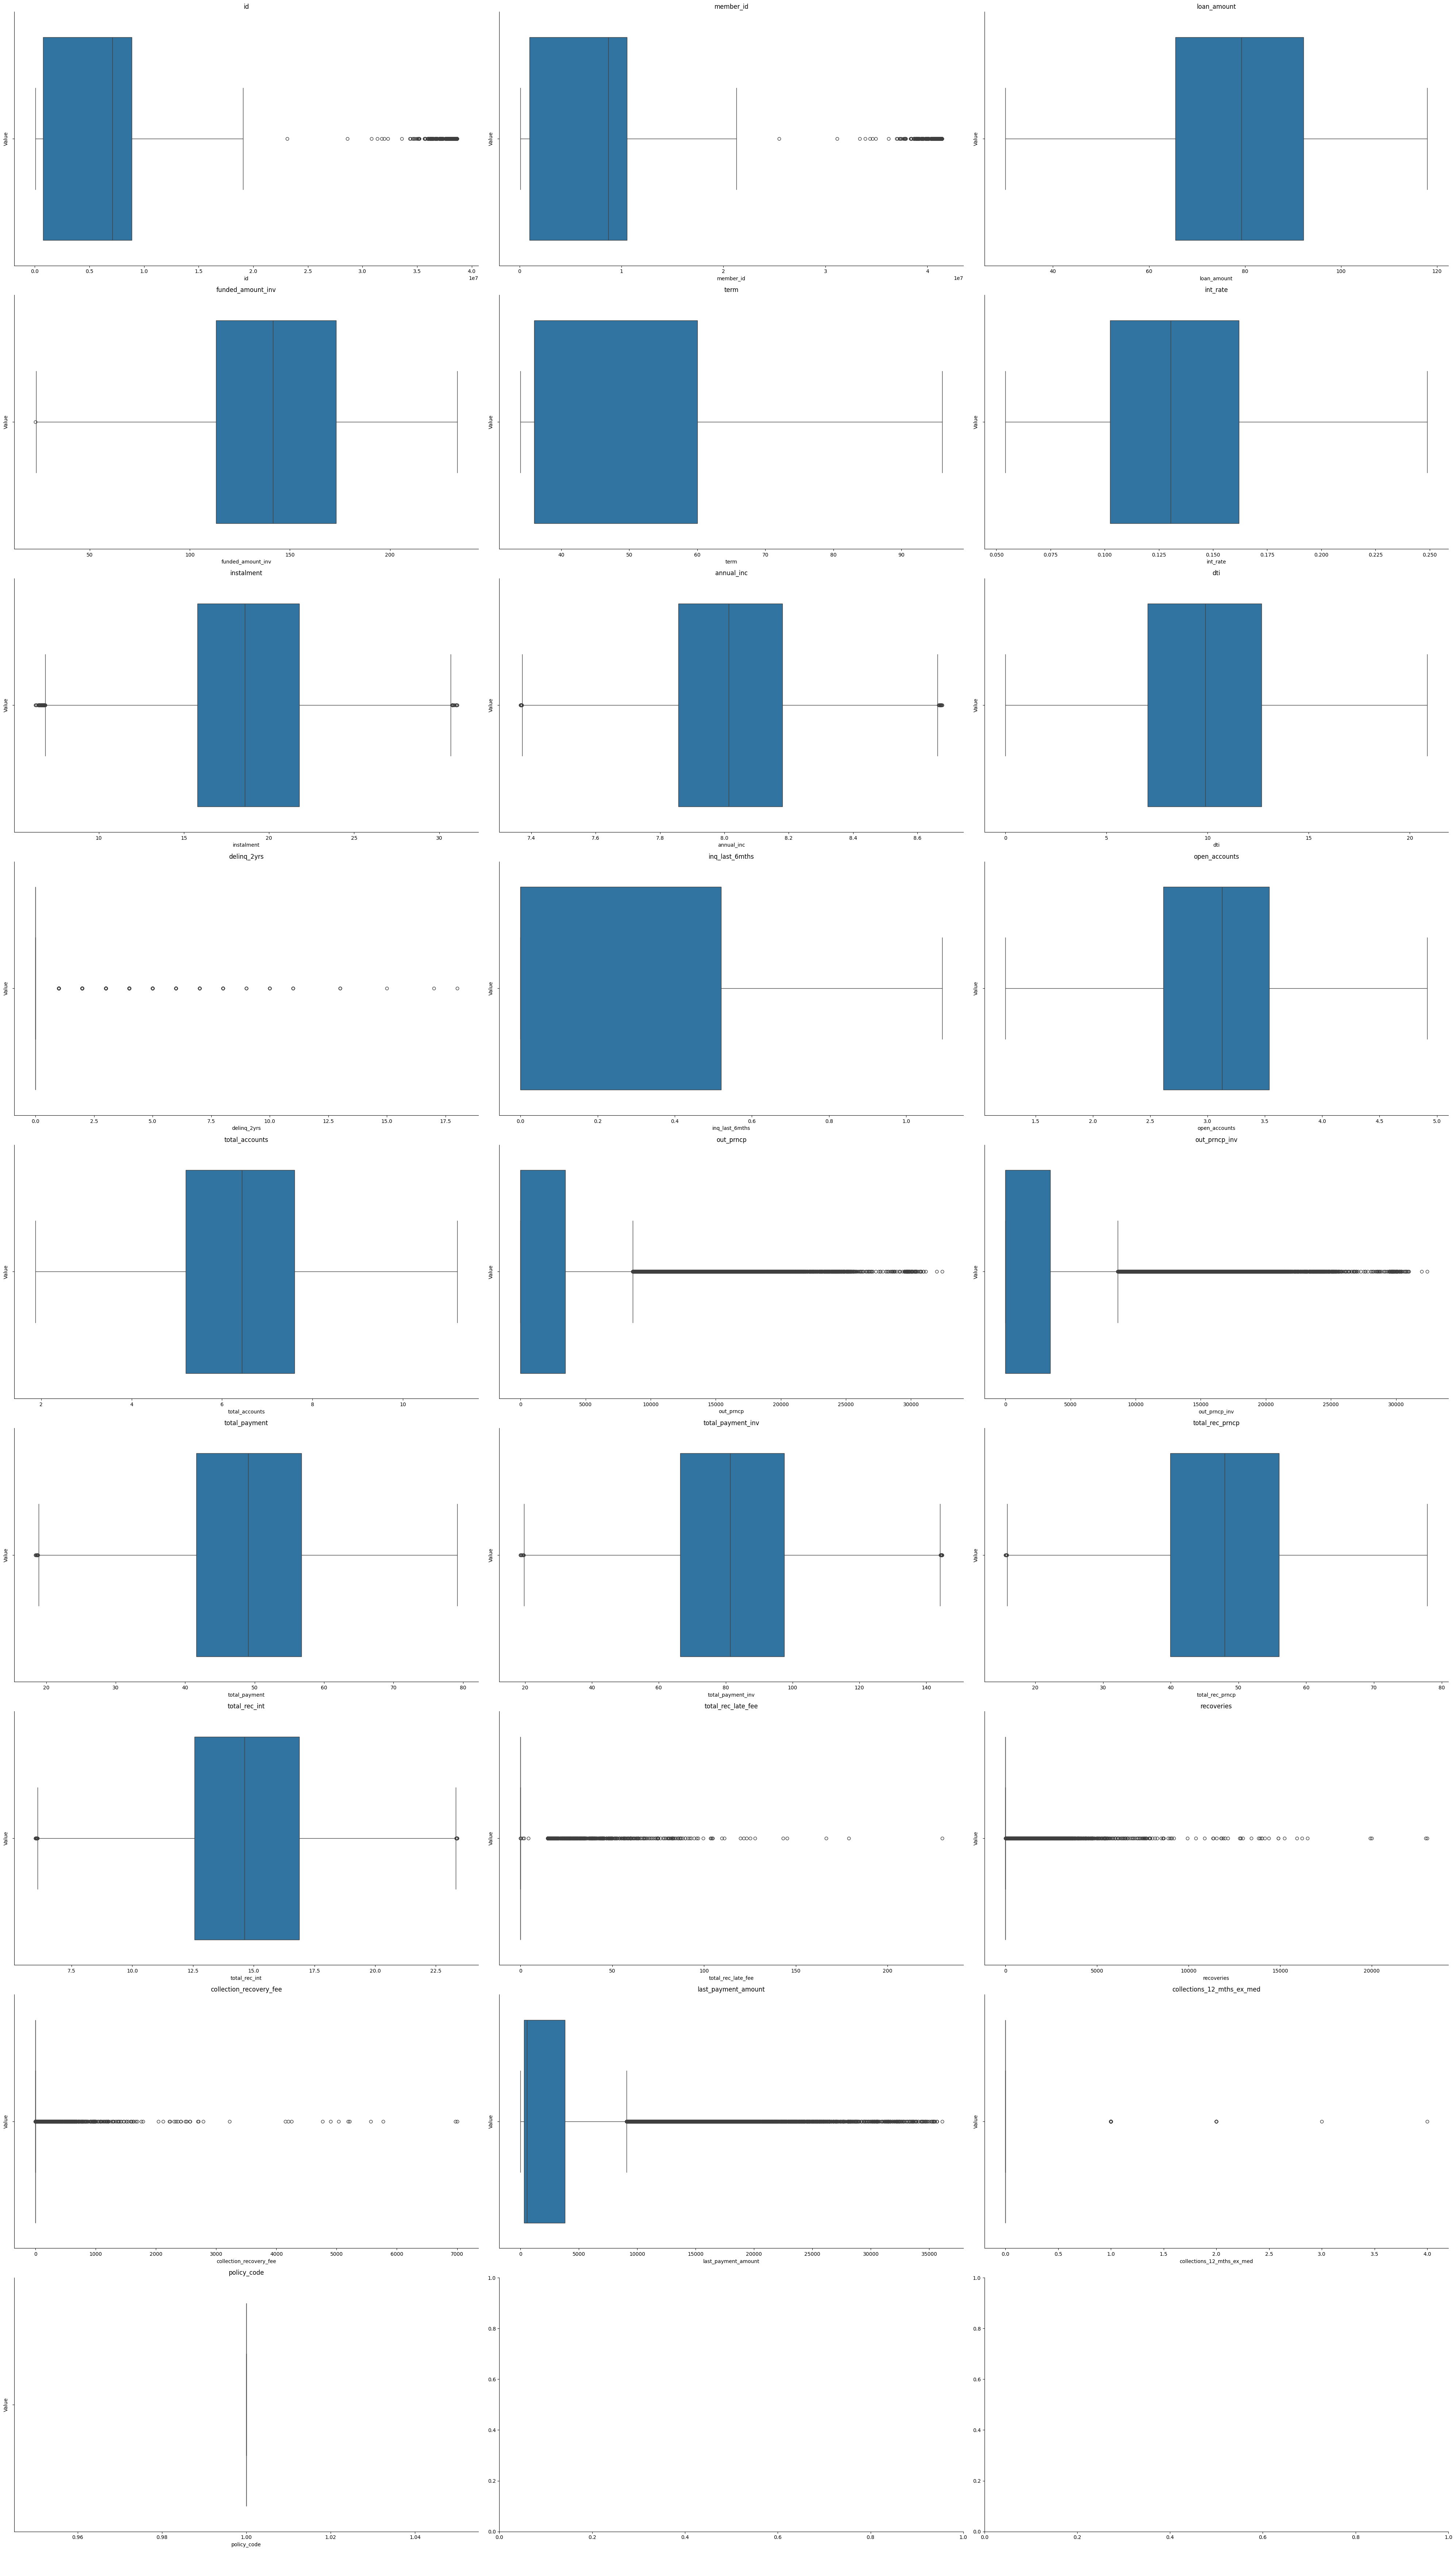

None


In [27]:
# code for boxplots
from db_utils_local import Plotter

dfplotter = Plotter(modified_df)

print(Plotter(modified_df).boxplot_with_scatter())

### Correlation in Columns

Highly correlated columns in a dataset can lead to multicollinearity issues, which can affect the accuracy and interpretability of models built on the data.

The following code outputs the correlation matrix of the numeric fields and displays this as a heatmap. It also outputs a csv to allow more detailed analysis.

                                  id  member_id  loan_amount  \
id                          1.000000   0.994195     0.132531   
member_id                   0.994195   1.000000     0.138896   
loan_amount                 0.132531   0.138896     1.000000   
funded_amount_inv           0.169037   0.177315     0.964749   
term                        0.021576   0.022662     0.357148   
int_rate                    0.050992   0.055455     0.159717   
instalment                  0.142104   0.149229     0.961136   
annual_inc                  0.059051   0.060774     0.454430   
dti                         0.190702   0.193213     0.108783   
delinq_2yrs                 0.061457   0.061725     0.003546   
inq_last_6mths             -0.072289  -0.075450    -0.040956   
open_accounts               0.144018   0.145041     0.223288   
total_accounts              0.095818   0.096026     0.251448   
out_prncp                   0.485024   0.489027     0.437691   
out_prncp_inv               0.485060   0

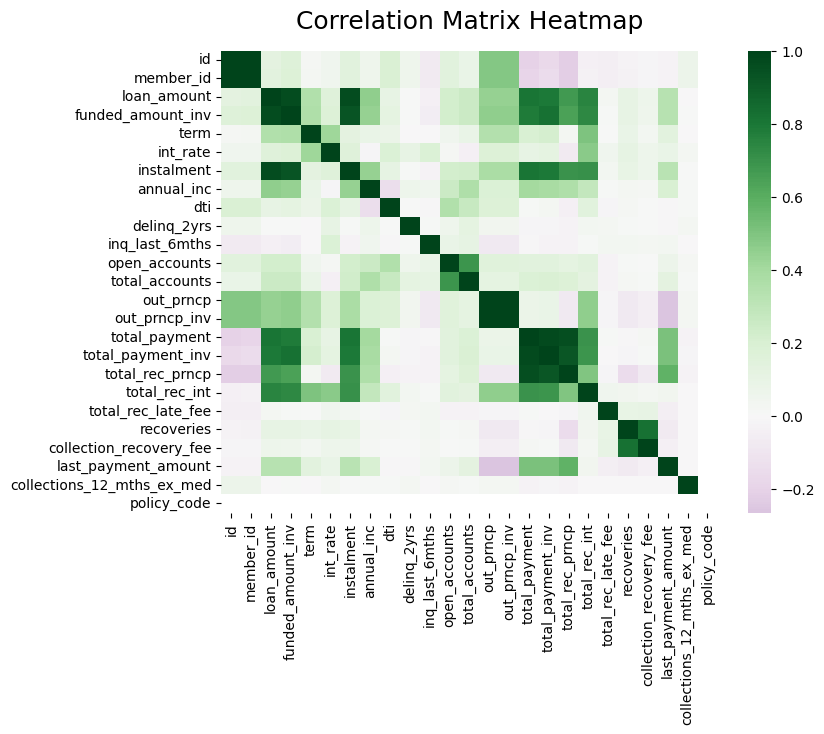

None


In [28]:
from db_utils_local import DataframeInfo

df_info = DataframeInfo(modified_df)

print(df_info.correlation_columns())  # print correlation function of modified_df

dfplotter = Plotter(modified_df) 

print(Plotter(modified_df).heatmap(df_info.correlation_columns()))  #Output Heatmap of correlation function

df_info.correlation_columns().to_csv('correlation_matrix.csv', index=True)

Based on the analysis of the figures in the csv by applying a correlation threshold of 0.9 the following columns will be removed due to high correlation with other columns:

funded_amount_inv
out_prncp_inv
total_payment_inv
total_rec_prncp

The id fields are index fields but both are highly correlated so member_id will also be removed, which has the added bonus of anonymising the data. 

In [29]:
from db_utils_local import DataFrameTransform

dftransformer = DataFrameTransform(modified_df)

dftransformer.delete_column('funded_amount_inv')
dftransformer.delete_column('out_prncp_inv')
dftransformer.delete_column('total_payment_inv')
dftransformer.delete_column('total_rec_prncp')
dftransformer.delete_column('instalment')
dftransformer.delete_column('member_id')

modified_df = dftransformer.return_dataframe()

Check the output with the correlation matrix and the heatmap.

A CSV is also outputed with the final modified dataframe as 'mod_loan_payments_post_skew_corr.csv'



                                  id  loan_amount      term  int_rate  \
id                          1.000000     0.132531  0.021576  0.050992   
loan_amount                 0.132531     1.000000  0.357148  0.159717   
term                        0.021576     0.357148  1.000000  0.419051   
int_rate                    0.050992     0.159717  0.419051  1.000000   
annual_inc                  0.059051     0.454430  0.094919 -0.017687   
dti                         0.190702     0.108783  0.083265  0.182482   
delinq_2yrs                 0.061457     0.003546  0.001915  0.109028   
inq_last_6mths             -0.072289    -0.040956  0.000328  0.188831   
open_accounts               0.144018     0.223288  0.054207  0.017782   
total_accounts              0.095818     0.251448  0.087870 -0.039392   
out_prncp                   0.485024     0.437691  0.349302  0.178836   
total_payment              -0.200184     0.811786  0.204245  0.104887   
total_rec_int              -0.042103     0.756033  

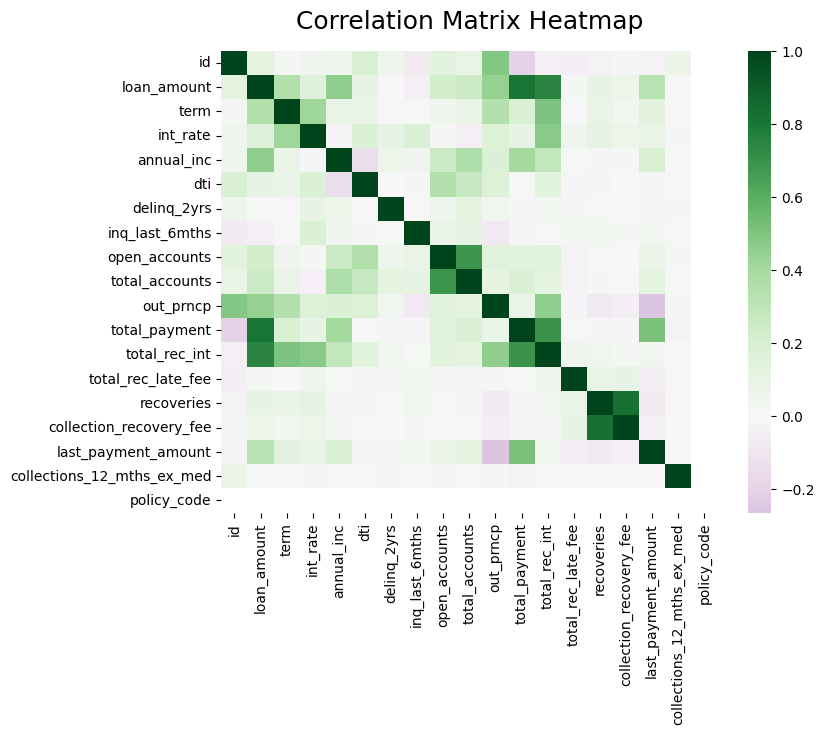

None


In [30]:
from db_utils_local import DataframeInfo

df_info = DataframeInfo(modified_df)

print(df_info.correlation_columns())  # print correlation function of modified_df

dfplotter = Plotter(modified_df)

print(Plotter(modified_df).heatmap(df_info.correlation_columns())) #Output Heatmap of correlation function

modified_df.to_csv('mod_loan_payments_post_skew_corr.csv', index=False)


All columns above 0.9 threshold have been removed, leading to a cleaner matrix.